In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline 
#команда %matplotlib inline указывает, что график выводится как картинка; достаточно указывать один раз в первой ячейке.

In [2]:
cust_df=pd.read_excel('Data/Cust_Segmentation.xlsx')
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Address
0,1,41,2,6,19,NBA001
1,2,47,1,26,100,NBA021
2,3,33,2,10,57,NBA013
3,4,29,2,4,19,NBA009
4,5,47,1,31,253,NBA008
...,...,...,...,...,...,...
845,846,27,1,5,26,NBA007
846,847,28,2,7,34,NBA002
847,848,25,4,0,18,NBA001
848,849,32,1,12,28,NBA012


In [3]:
df=cust_df.drop('Address', axis=1)
df

,Customer Id,Age,Edu,Years Employed,Income
0,1,41,2,6,19
1,2,47,1,26,100
2,3,33,2,10,57
3,4,29,2,4,19
4,5,47,1,31,253
...,...,...,...,...,...
845,846,27,1,5,26
846,847,28,2,7,34
847,848,25,4,0,18
848,849,32,1,12,28


Text(0, 0.5, 'Income')

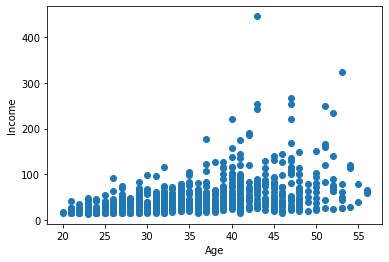

In [4]:
plt.scatter(df.Age,df['Income'])
plt.xlabel('Age')
plt.ylabel('Income')

In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np
X = df.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, -0.74441888],
       [-0.37694723, -0.76634938,  0.50696349, -0.484816  ],
       [ 2.1116364 , -0.76634938,  1.09746566,  0.44975434]])

In [6]:
scaler = MinMaxScaler()

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Years Employed']])
df['Years Employed'] = scaler.transform(df[['Years Employed']])

scaler.fit(df[['Edu']])
df['Edu'] = scaler.transform(df[['Edu']])
df

,Customer Id,Age,Edu,Years Employed,Income
0,1,0.583333,0.25,0.181818,0.013857
1,2,0.750000,0.00,0.787879,0.200924
2,3,0.361111,0.25,0.303030,0.101617
3,4,0.250000,0.25,0.121212,0.013857
4,5,0.750000,0.00,0.939394,0.554273
...,...,...,...,...,...
845,846,0.194444,0.00,0.151515,0.030023
846,847,0.222222,0.25,0.212121,0.048499
847,848,0.138889,0.75,0.000000,0.011547
848,849,0.333333,0.00,0.363636,0.034642


In [7]:
from sklearn.cluster import KMeans
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters=clusterNum,n_init=12)
k_means.fit(X)
labels=k_means.labels_
print(labels)

[0 1 0 0 2 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 1 0 2 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 2 0 1 0 0 0 0 0 0 2 1 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0
 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 2 0 0 0 1 0 1 1 1 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 2
 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 1 0 2 0 0 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 

In [8]:
df['Clus_km']=labels
df

,Customer Id,Age,Edu,Years Employed,Income,Clus_km
0,1,0.583333,0.25,0.181818,0.013857,0
1,2,0.750000,0.00,0.787879,0.200924,1
2,3,0.361111,0.25,0.303030,0.101617,0
3,4,0.250000,0.25,0.121212,0.013857,0
4,5,0.750000,0.00,0.939394,0.554273,2
...,...,...,...,...,...,...
845,846,0.194444,0.00,0.151515,0.030023,0
846,847,0.222222,0.25,0.212121,0.048499,0
847,848,0.138889,0.75,0.000000,0.011547,0
848,849,0.333333,0.00,0.363636,0.034642,0


In [9]:
df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income
Clus_km,,,,,
0,432.361409,0.360388,0.153905,0.194441,0.042327
1,401.088398,0.598066,0.241713,0.464758,0.167035
2,421.625000,0.704861,0.421875,0.596591,0.514579


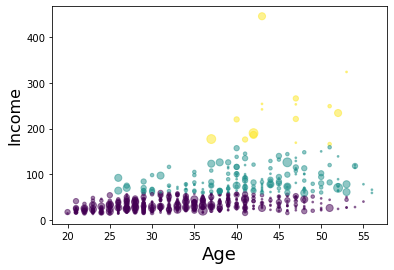

In [10]:
import matplotlib.pyplot as plt
area=np.pi * (X[:,1])**2
plt.scatter(X[:,0], X[:,3], s=area, c=labels.astype(np.float),alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

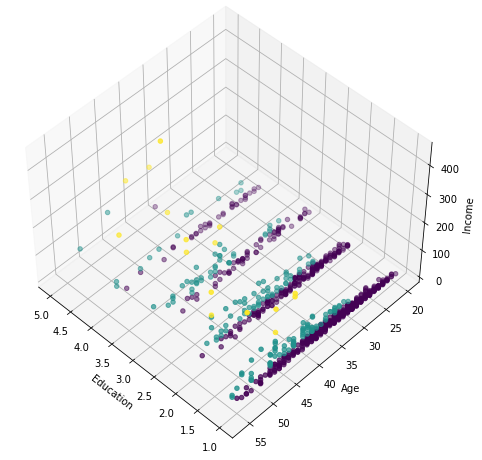

In [11]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1, figsize=(8,6))
plt.clf()
ax=Axes3D(fig, rect=(0,0,.95,1), elev=48,azim=134)

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:,1], X[:,0],X[:,3], c=labels.astype(np.float))

In [12]:
sse = [] #метод локтя
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

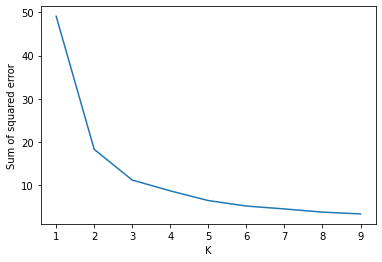

In [13]:
plt.xlabel('K') #график метода локтя
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

![Метод локтя](https://ichi.pro/assets/images/max/724/1*RnvrdhlUxHWss3vOffHT5g.png)